In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import csv
import requests

from datetime import datetime
from bs4 import BeautifulSoup as soup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:00<00:00, 16.1MB/s]


In [3]:
# Visit the Mars News site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

First look at the data from the url we find these headers, they mean:


id: identification number for a single transmission from Curiosity rover

terrestrial_date: date per Earth time

sol: number of Martian days Curiosity has been on Mars

ls: solar longitude

month: Martian month

min_temp: min temp recorded per each Martian day (in Celcius)

pressure: atmospheric pressure recorded at Curiosity's location

In [4]:
# Set up HTML Parser
html = browser.html
temps_soup = soup(html, 'html.parser')

In [5]:
# Source for help with code: https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup

# Create dictionary for table data
mars_temps_dict = {}

# Find table using BeautifulSoup and Splinter
table = temps_soup.find('table', class_='table')

In [6]:
# Create list to place header row
headers = []
# Use for loop to iterate through table to collect headers
for th in table.find_all("th"):
    headers.append(th.text)

In [7]:
# Create list to place td data rows
td_rows = []
# Use for loop to iterate through table to collect data
for td in table.find_all('td'):
    td_rows.append(td.text)

In [8]:
for th in headers:
    for td in td_rows:
        mars_temps_dict = dict(zip(headers, td_rows))
mars_temps_dict

{'id': '2',
 'terrestrial_date': '2012-08-16',
 'sol': '10',
 'ls': '155',
 'month': '6',
 'min_temp': '-75.0',
 'pressure': '739.0'}

Became stuck at this point, so moved to using pandas. Had tried itertools to continually cycle through the headers until td_rows ended, but could not find a way to make it work at this time.

Alternative method using pandas to read HTML into DataFrame

In [53]:
# Use pd.read_html to read HTML into DataFrame
mars_table_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_table_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [54]:
# Name columns - in this case could have done mars_table_df.columns['id', etc...], but this worked as well in this case
mars_temps_df = mars_table_df[0]
mars_temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [57]:
# Review data by using .info() and .describe()

mars_temps_df.info()

mars_temps_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


Question 1: How many months exist on Mars?

Answer: Mars experiences 12 months. (Code below as well as the min and max in the month column from .describe() above gives us this information.)

In [58]:
# From month column, use .nunique to count the number of unique month numbers
print(mars_temps_df['month'].nunique())

12


Question 2: How many Martian (and not Earth) days worth of data exist in the scraped dataset?

Answer: There are 1867 unique days worth of data in the scraped dataset. (This is also noticeable when looking at the .info() and .describe() from above.)

In [59]:
# From sol column, use .nunique to count the number of unique solar days
print(mars_temps_df['sol'].nunique())

1867


Question 3: What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

Answer: Month 8 is the warmest month on Mars, at -68.38 degrees F.
        Month 3 is the coldest month on Mars, at -83.31 degrees F.

month
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
7    -72.281690
12   -74.451807
6    -75.299320
1    -77.160920
5    -79.308725
2    -79.932584
4    -82.747423
3    -83.307292
Name: min_temp, dtype: float64
--------
Max Temp:  -68.38297872340425
Min Temp:  -83.30729166666667
--------


<AxesSubplot: xlabel='month'>

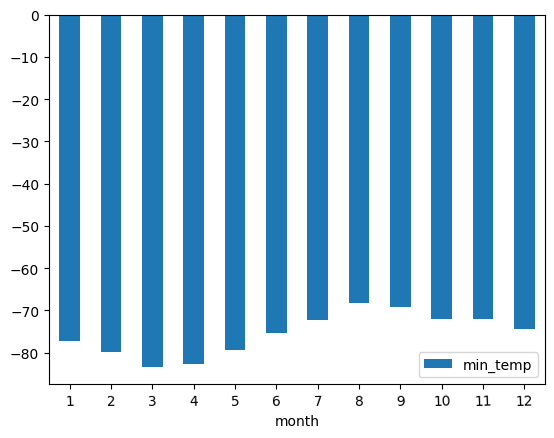

In [61]:
# Use groupby for month in the min_temp column to obtain the average for each month
# Then sort from lowest to highest temps
mars_temps = mars_temps_df.groupby(by=['month'])["min_temp"].mean()
print(mars_temps.sort_values(ascending=False))
print('--------')

# Print out the max and min temps using iloc to take the lowest temp at the first position
# And the highest temp at the last position
print('Max Temp: ', mars_temps.sort_values(ascending=False).iloc[0])
print('Min Temp: ', mars_temps.sort_values(ascending=False).iloc[-1])
print('--------')

temps_df = pd.DataFrame(mars_temps)
mars_temps_chart = temps_df.plot.bar(rot=2)
mars_temps_chart

Question 4: Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

Answer: Month 9 has the highest atmospheric pressure at 913.31
        Month 6 has the lowest atmospheric pressure at 745.10

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64
--------
Max Temp:  913.3059701492538
Min Temp:  745.0544217687075
--------


<AxesSubplot: xlabel='month'>

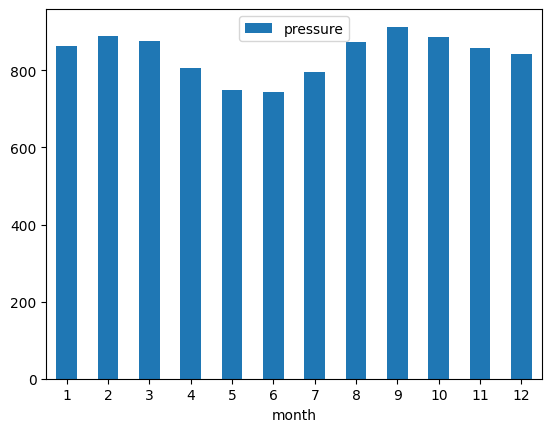

In [45]:
# Use groupby for month in the min_temp column to obtain the average for each month
mars_pressure = mars_temps_df.groupby(by=['month'])["pressure"].mean()
print(mars_pressure)
print('--------')

# Print out the max and min temps
print('Max Temp: ', mars_pressure.max())
print('Min Temp: ', mars_pressure.min())
print('--------')

pressure_df = pd.DataFrame(mars_pressure)
pressure_chart = pressure_df.plot.bar(rot=0)
pressure_chart

Question 5: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

Answer: Using the chart below, we can visually estimate 2.75 Earth years in the data. From this, we can divide the total number of Earth dats in the data and divide by the 2.75 to come up with an estimate of about ~680 days in one Martian year.

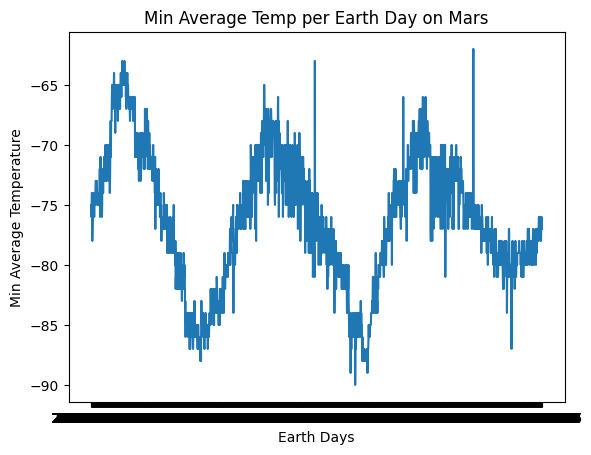

In [90]:
x = mars_temps_df['terrestrial_date']
y = mars_temps_df['min_temp']

plt.plot(x,y)
plt.ylabel("Min Average Temperature")
plt.xlabel("Earth Days")
plt.title("Min Average Temp per Earth Day on Mars")
plt.show()

In [91]:
# The plot above, using the low and high peaks, shows about 2.75 years
# of Earth days - divide the total Earth days by the number of cycles
mars_temps_df['terrestrial_date'].nunique()/2.75

678.9090909090909

In [95]:
# Export to csv file
mars_temps_df.to_csv("../Mission-to-Mars/mission_to_mars.csv", index=False)